## KMeans

- General Process
    - Unsupervised learning method (unlabeled data) that clusters into k different clusters
    - Each sample is assigned to the cluster with the nearest mean, and then the means and clusters are updated during an iterative optimization process
    -  Use the Euclidean Distance to find the distance between two feature vectors.
- Iterative Optimization
    - Randomly initalize cluster centers 
    - Repeat these steps until convergence
        - Update cluster labels by assigning points to the nearest cluster
        - Update cluster centers (centriods) by setting the center to the mean of each cluster

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [25]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # List of samples indices for each cluster
        self.clusters = [[]for _ in range(self.K)]
        
        # The centers (mean vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initalize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

            # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
        
    def _get_cluster_labels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
            return labels
        
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # Distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        # Assign the mean value of the clusters to the centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
            return centroids
        
    def _is_converged(self, centroids_old, centroids):
        # Distances between old and new centroids for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


(500, 2)
3


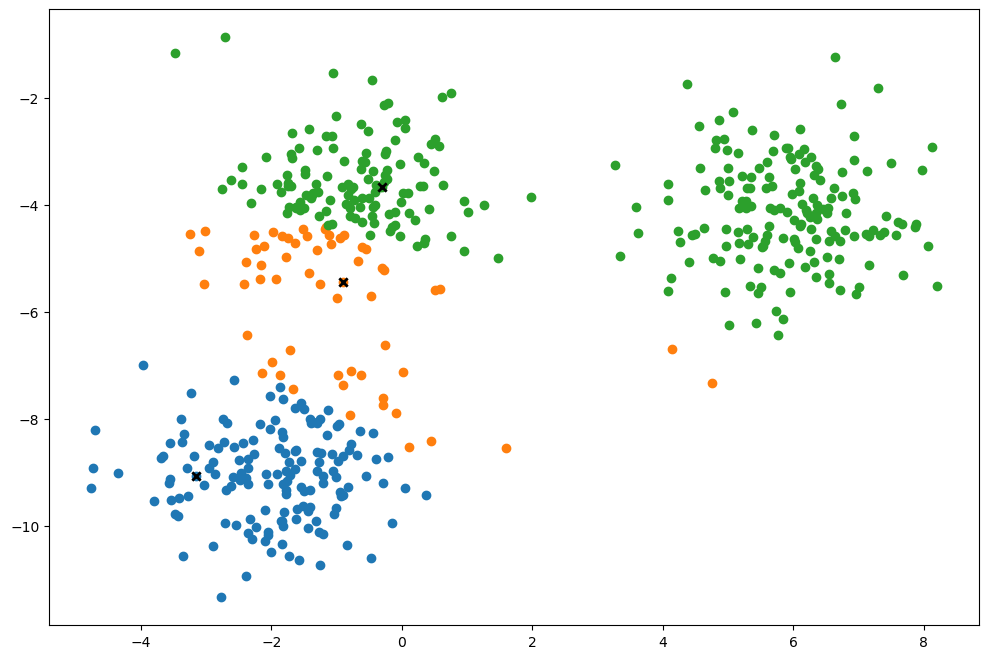

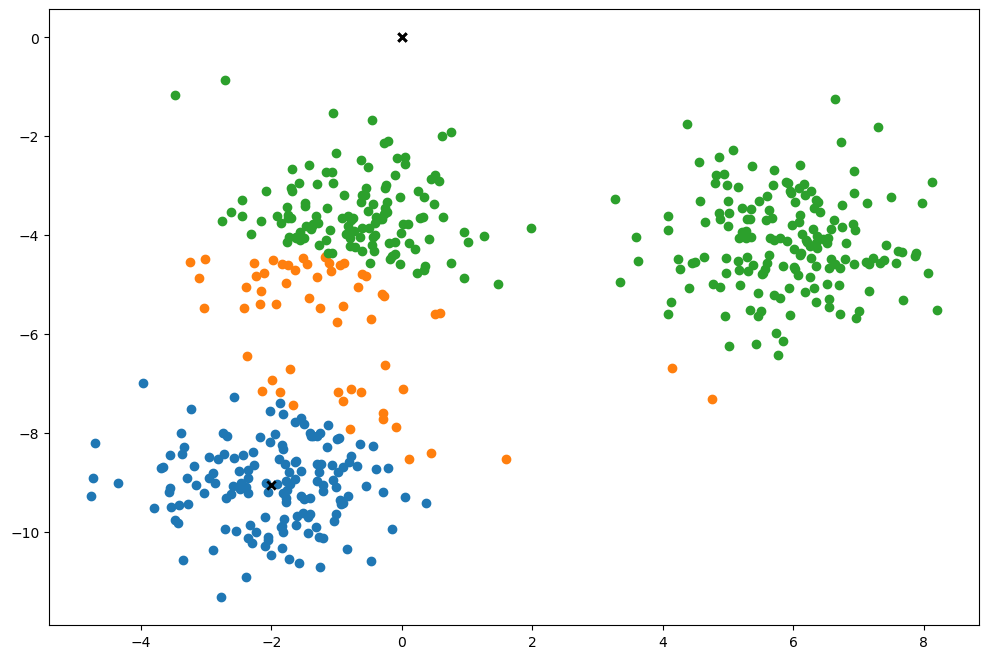

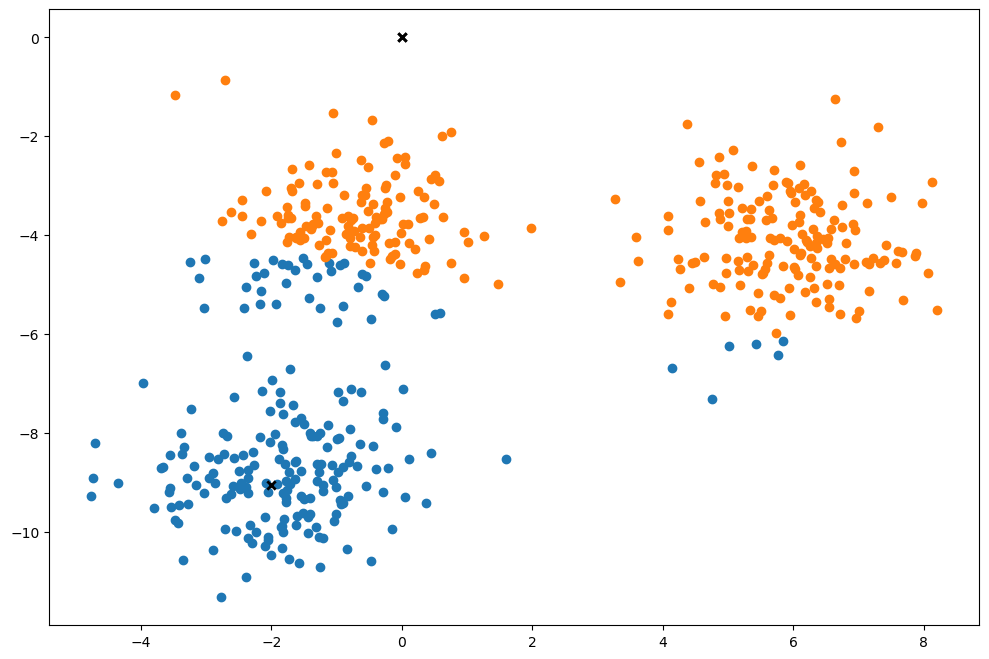

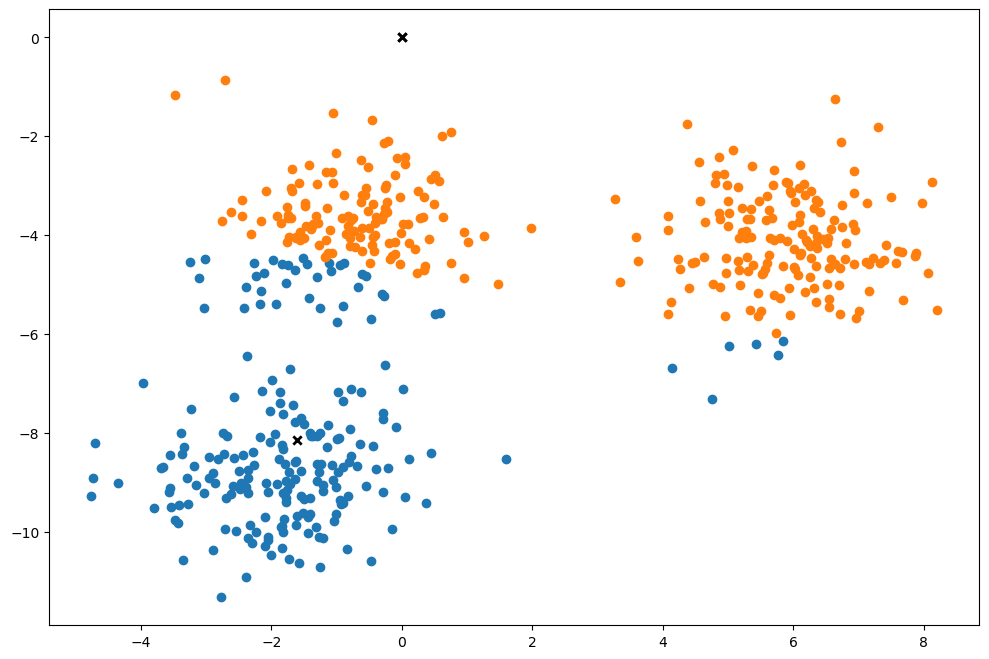

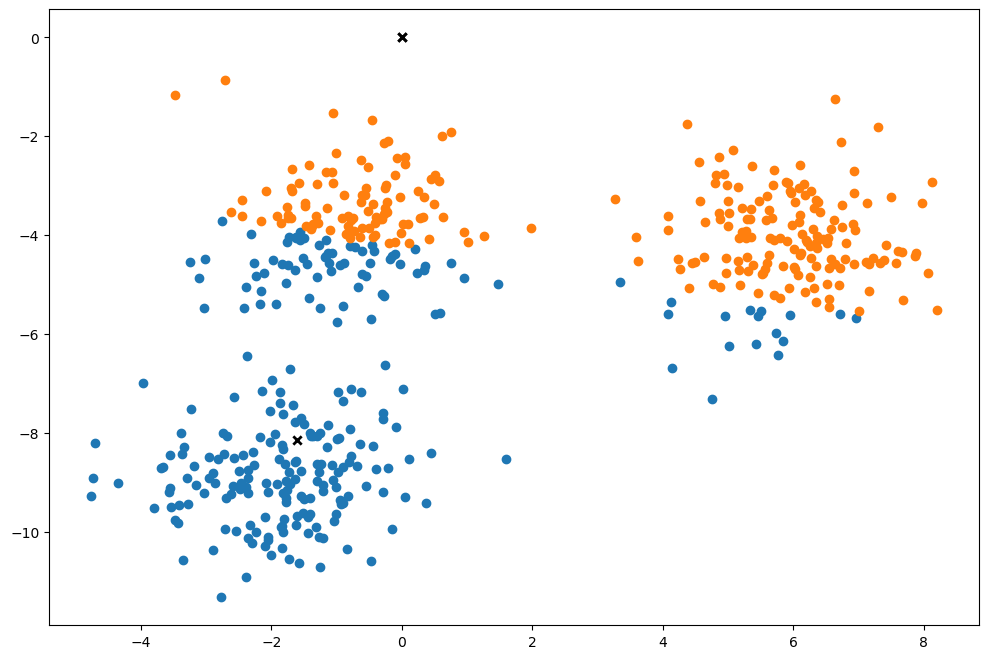

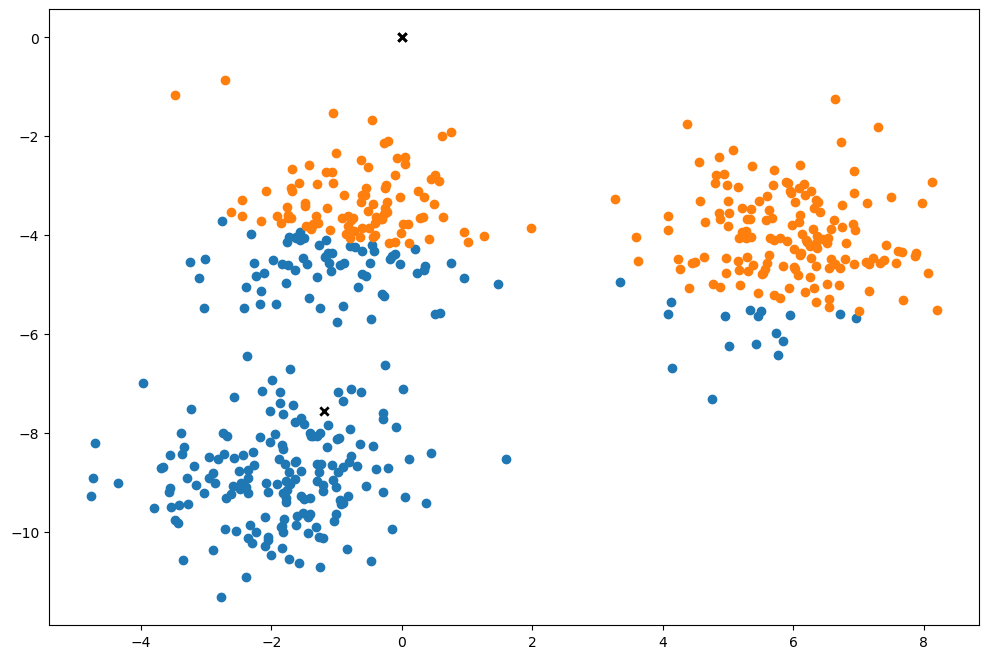

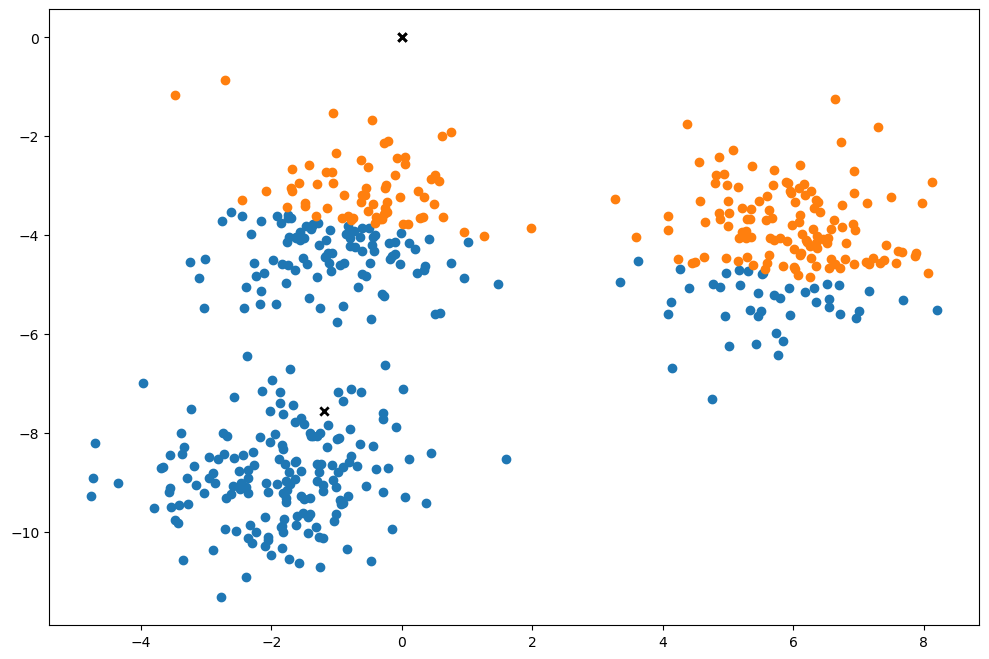

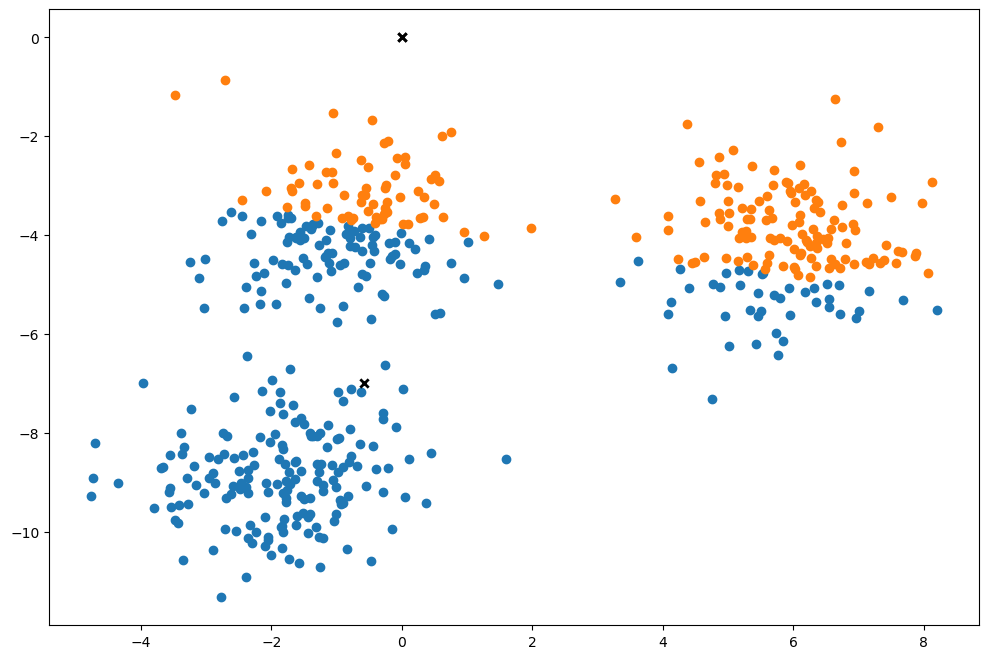

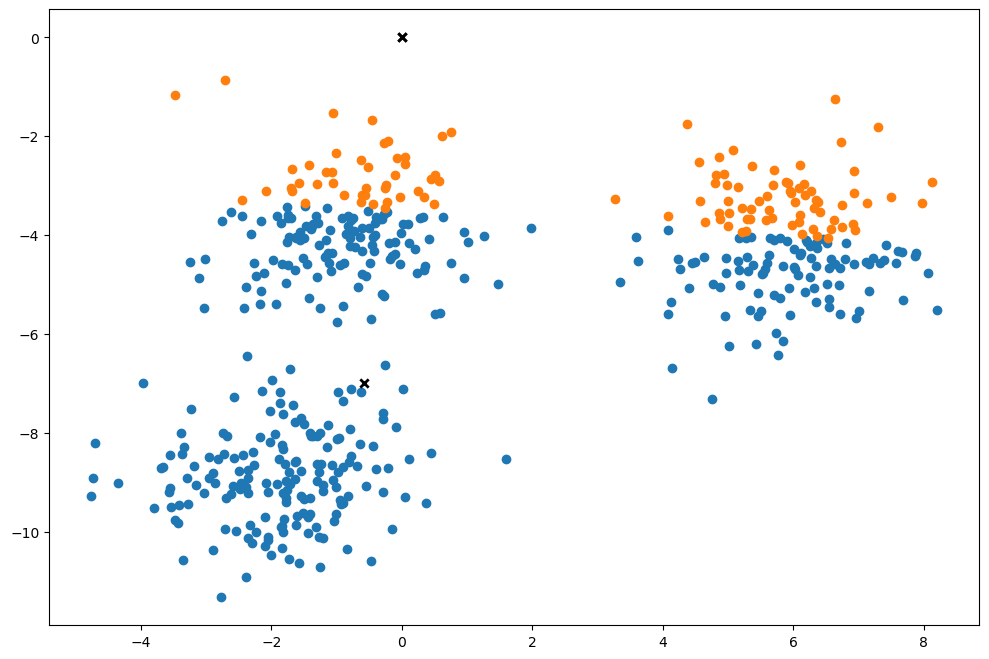

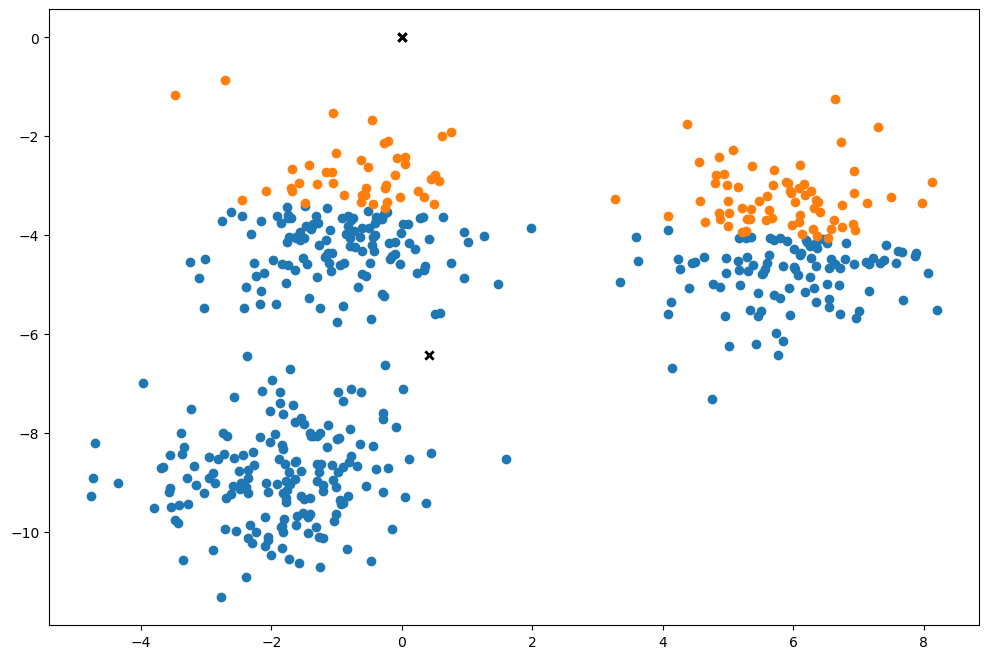

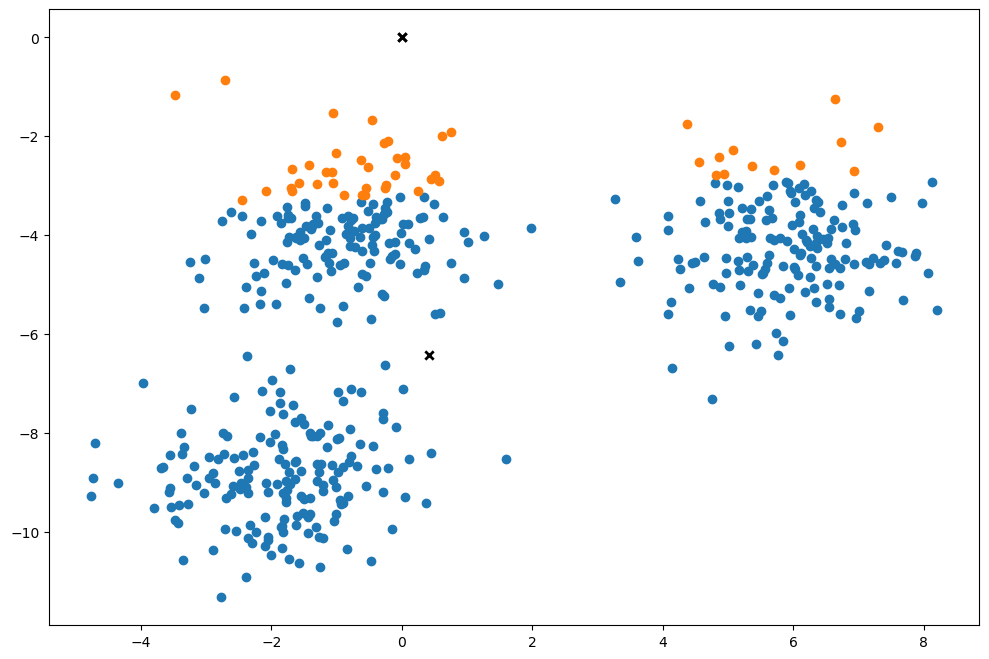

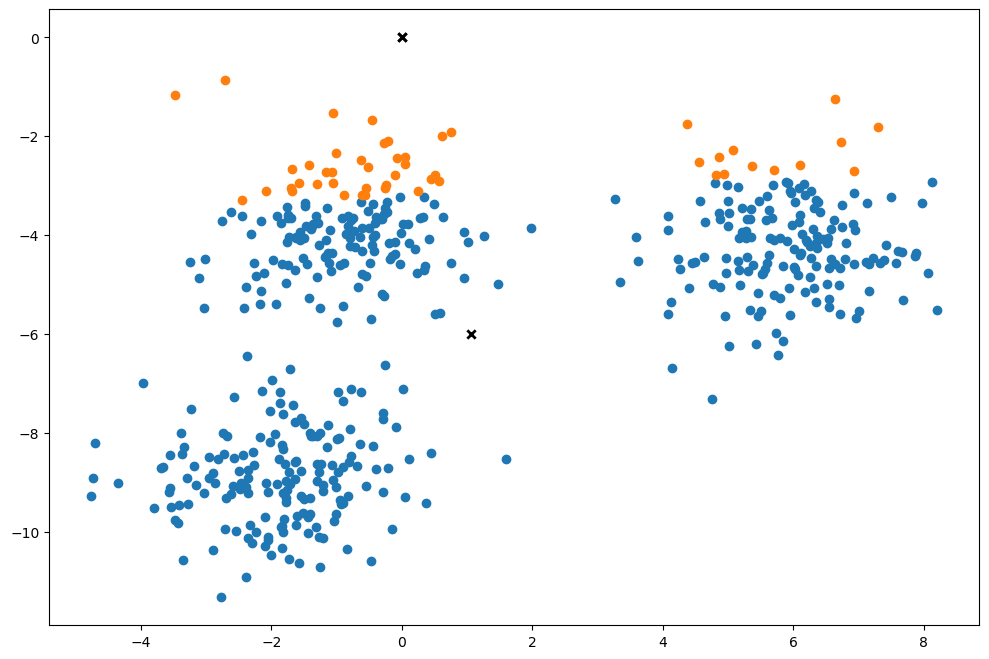

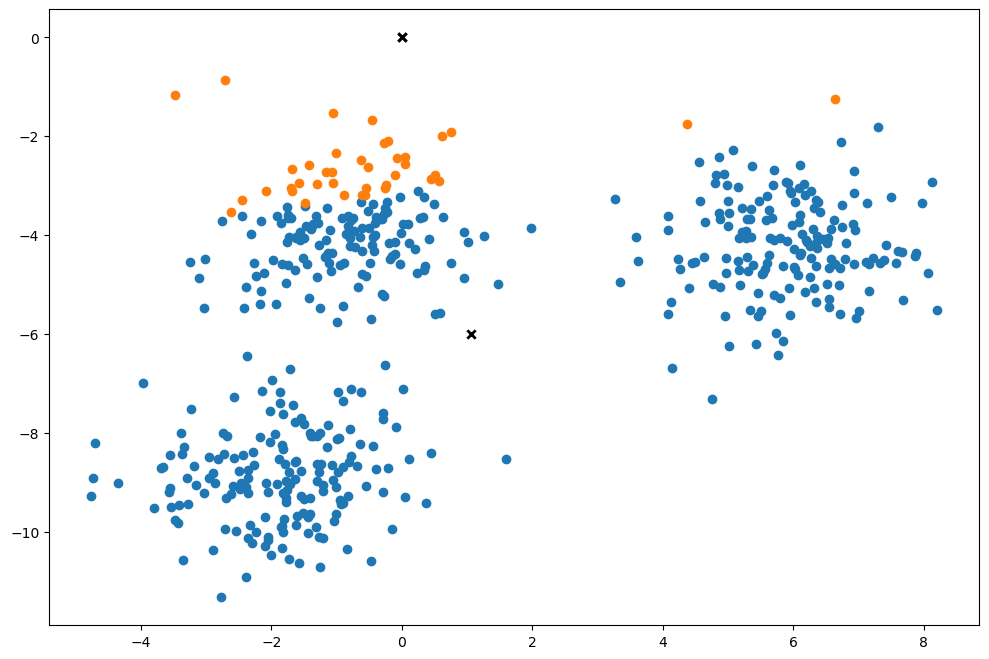

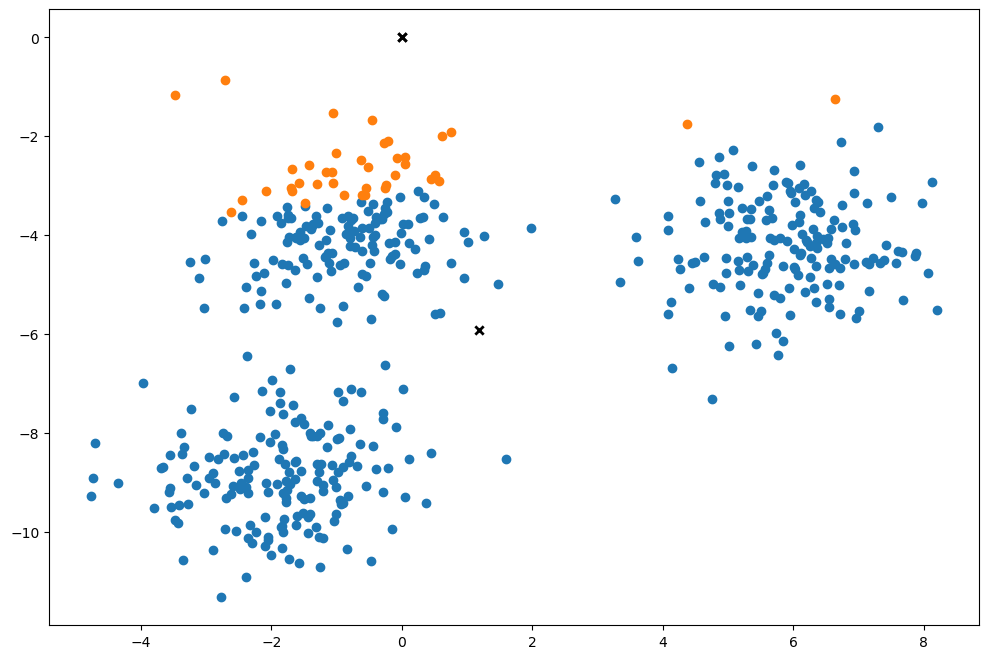

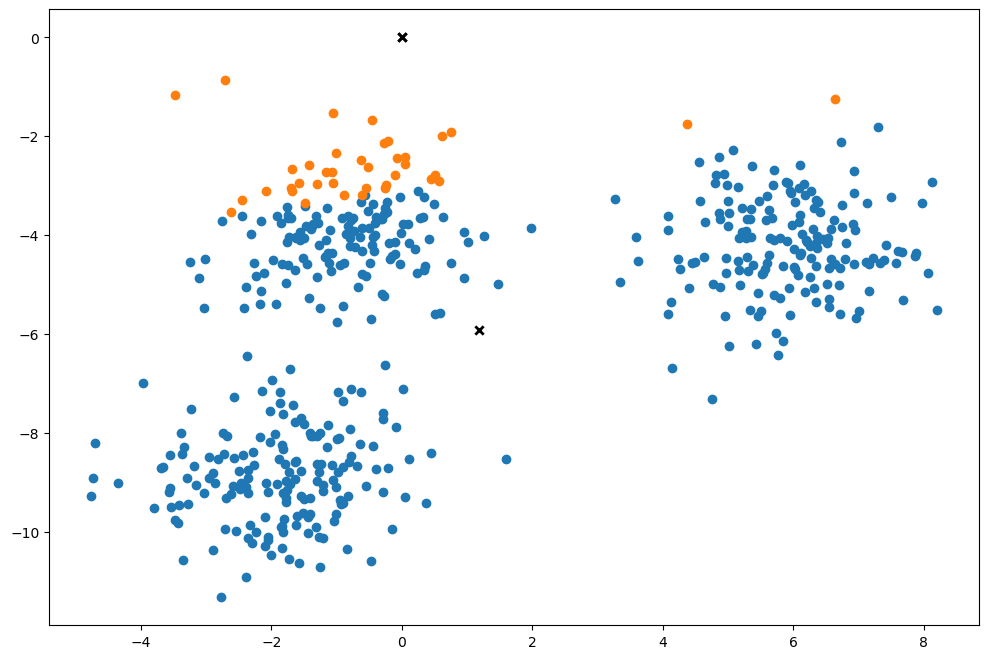

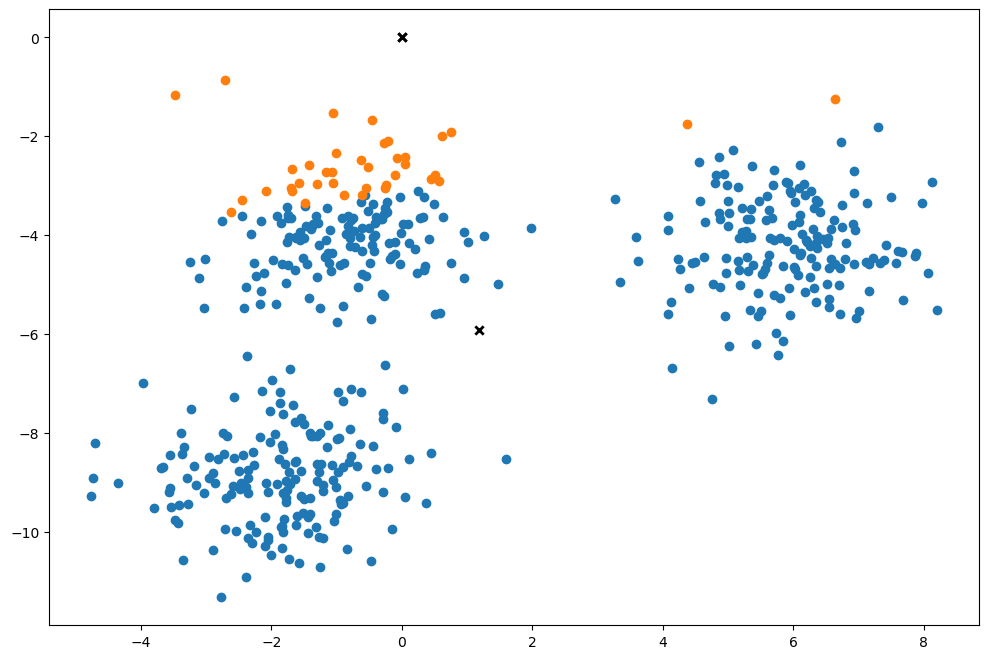

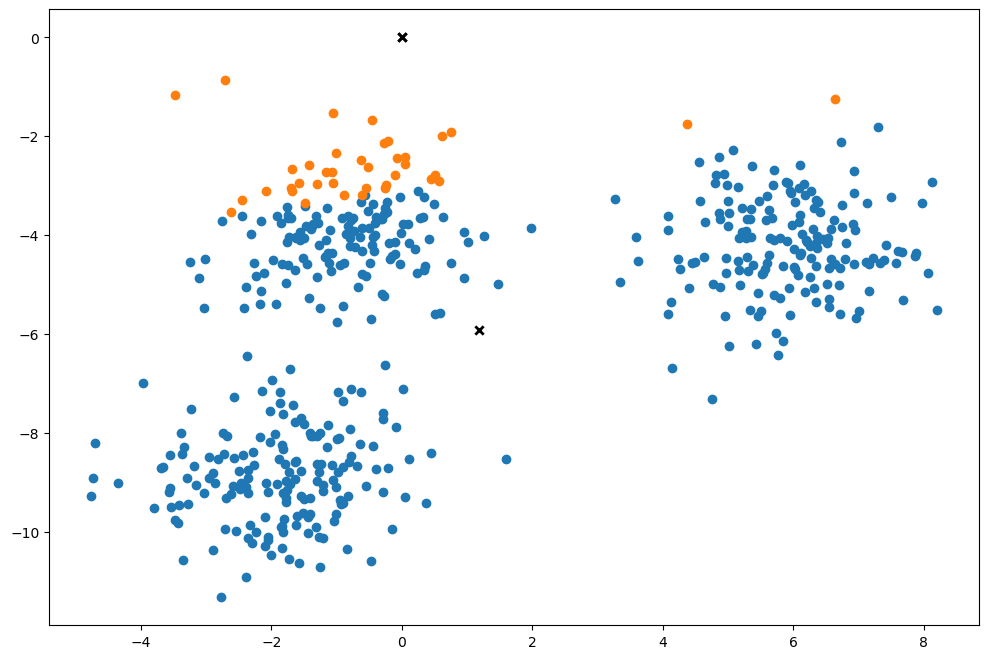

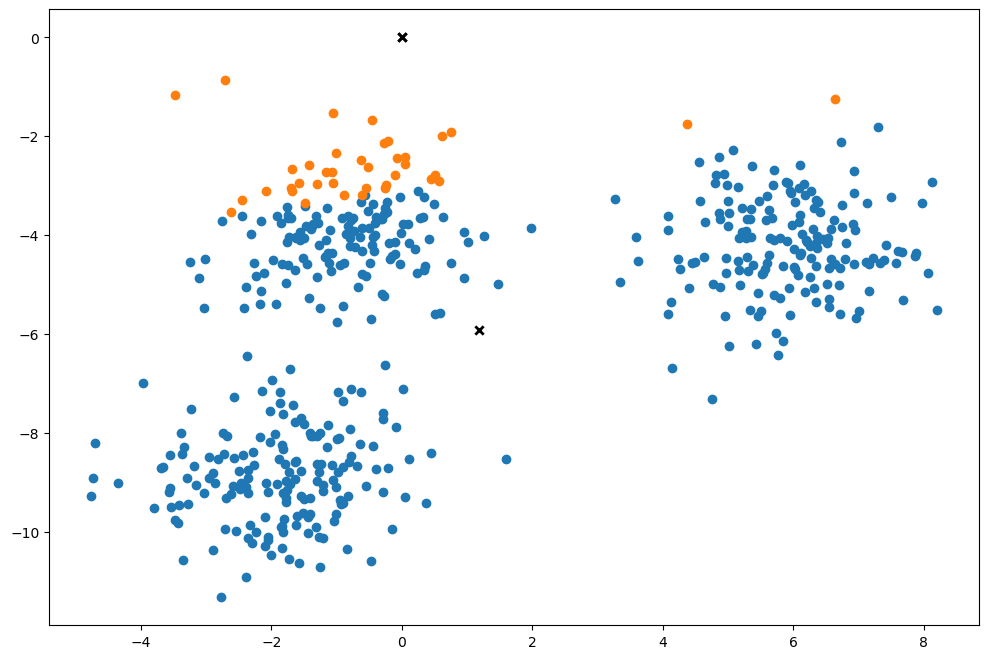

In [26]:
np.random.seed(42)
X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()